I'm a long distance runner in my personal life, and in 2019, I ran for Reykjavik Marathon. 

I was aiming to run it in under 3 hours (known as "sub-3"), but I failed and ended up being a sub-4 runner for the marathon.
I was on a good pace even after the half point, but somewhere around 30k, I got cramps and lost speed.
As a tendency, do sub-3 runners maintain the same-level speed all the way through?
Or do they also have a slower pace after around the same point as I did? I'd love to check in order to become a stronger runner with some insights!

In Reykjavik Marathon, they record split times at 29.4k. Let's check if the average running speed is significantly different before and after this point. 

- Null hypothesis 1: The difference between the average running speed before and after 29.4k among the sub-3 runners is zero.
- Althernative hypothesis 1: The average running speed before and after 29.4k among the sub-3 runners is different.　
- α: 0.05


- Null hypothesis 2: The difference between the average running speed before and after 29.4k among the sub-4 runners is zero.
- Althernative hypothesis 2: The average running speed before and after 29.4k among the sub-4 runners is different.　
- α: 0.05

## Data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

url = 'https://timataka.net/reykjavikurmarathon2019/urslit/?race=1&cat=overall' # Results from Reykjavik Marathon 2019
df_lists = pd.io.html.read_html(url)
df_lists

[      Rank   BIB                        Name Unnamed: 3   YOB Nat.  \
 0        1  1200             Arnar Pétursson          M  1991  ISL   
 1        2  1700            Brian Petrocelli          M  1977  USA   
 2        3   403               Drake Vidrine          M  1974  USA   
 3        4   399    Sigurjón Ernir Sturluson          M  1990  ISL   
 4        5   417         GEORGIOS TSIGERIDIS          M  1982  GRC   
 ...    ...   ...                         ...        ...   ...  ...   
 1168  1169  1528            MARCELLINO ISOLI          M  1958  ITA   
 1169  1170  1380  Puttachart Charapattanakul          F  1967  THA   
 1170  1171  1702                 Frank Smits          M  1965  NLD   
 1171  1172  1002        Nancy Anne Calderone          F  1991  USA   
 1172  1173   360  Áslaug Heiða Gunnarsdóttir          F  1983  ISL   
 
                          Club  \
 0                          ÍR   
 1                         NaN   
 2           Kansas City Smoke   
 3        

In [2]:
# Extract the sub-3 and sub-4 runners only
target_runners = df_lists[0][df_lists[0]['Time']<'04:00:00']
target_runners

,Rank,BIB,Name,Unnamed: 3,YOB,Nat.,Club,Split,Time,Behind,Chiptime
0,1,1200,Arnar Pétursson,M,1991,ISL,ÍR,"00:16:45 (5 km)00:33:32 (10 km)00:54:24 (16,4 ...",02:23:08,NaN,02:23:07
1,2,1700,Brian Petrocelli,M,1977,USA,NaN,"00:18:55 (5 km)00:37:25 (10 km)01:00:11 (16,4 ...",02:38:20,+15:12,02:38:16
2,3,403,Drake Vidrine,M,1974,USA,Kansas City Smoke,"00:19:37 (5 km)00:38:47 (10 km)01:02:36 (16,4 ...",02:44:45,+21:37,02:44:41
3,4,399,Sigurjón Ernir Sturluson,M,1990,ISL,2XU / On Running,"00:19:41 (5 km)00:39:22 (10 km)01:03:44 (16,4 ...",02:45:40,+22:32,02:45:38
4,5,417,GEORGIOS TSIGERIDIS,M,1982,GRC,AGS NEAS IONIAS ANATOLI,"00:19:16 (5 km)00:38:20 (10 km)01:02:13 (16,4 ...",02:47:08,+24:00,02:47:07
...,...,...,...,...,...,...,...,...,...,...,...
450,451,1202,Scott Jarvis,M,1984,GBR,Altrincham,"00:32:23 (5 km)01:00:04 (10 km)01:32:48 (16,4 ...",03:59:46,+01:36:38,03:56:52
451,452,1521,Torben Immisch,M,1969,DNK,Mikkeller Running Club,"00:29:29 (5 km)00:56:44 (10 km)01:30:53 (16,4 ...",03:59:48,+01:36:40,03:58:07
452,453,1131,Adam Naser,M,1979,DNK,Mikkeller Running Club,"00:29:29 (5 km)00:56:45 (10 km)01:30:54 (16,4 ...",03:59:49,+01:36:41,03:58:08
453,454,754,Stefan Dr. Sattler,M,1965,DEU,Sportlich-Team Bornheim,"00:30:01 (5 km)00:57:57 (10 km)01:33:13 (16,4 ...",03:59:54,+01:36:46,03:58:14


## Data cleansing

It looks from the race result page that a few runners missed some internal records. I would like to omit rows with such data to compare records on the same ground. The correct number of intermediate results in this case is 6 (5 km, 10km, 16.4 km, 21.1km, 29.4 km, 38 km).　I will use the regular expression ```\([0-9]*\skm\)| \([0-9]*,[0-9]*\skm\``` to omit the "(x km)" parts. It will split each record in "Split" 6 times, which will make the number of elements 7, with a space at the end.

In [3]:
import re

ir_list = []
reg = ' \([0-9]*\skm\)| \([0-9]*,[0-9]*\skm\)'

# Find out the BIBs of irregular records
for count, value in enumerate(target_runners['Split']):
    splits = re.split(reg, value)
    if len(splits) != 7:
        ir_list.append(target_runners.loc[count]['BIB'])
print(ir_list)

[283, 632, 468]


In [4]:
 # Omit the irregular data
cleansed_df = target_runners[~target_runners['BIB'].isin(ir_list)]
cleansed_df

,Rank,BIB,Name,Unnamed: 3,YOB,Nat.,Club,Split,Time,Behind,Chiptime
0,1,1200,Arnar Pétursson,M,1991,ISL,ÍR,"00:16:45 (5 km)00:33:32 (10 km)00:54:24 (16,4 ...",02:23:08,NaN,02:23:07
1,2,1700,Brian Petrocelli,M,1977,USA,NaN,"00:18:55 (5 km)00:37:25 (10 km)01:00:11 (16,4 ...",02:38:20,+15:12,02:38:16
2,3,403,Drake Vidrine,M,1974,USA,Kansas City Smoke,"00:19:37 (5 km)00:38:47 (10 km)01:02:36 (16,4 ...",02:44:45,+21:37,02:44:41
3,4,399,Sigurjón Ernir Sturluson,M,1990,ISL,2XU / On Running,"00:19:41 (5 km)00:39:22 (10 km)01:03:44 (16,4 ...",02:45:40,+22:32,02:45:38
4,5,417,GEORGIOS TSIGERIDIS,M,1982,GRC,AGS NEAS IONIAS ANATOLI,"00:19:16 (5 km)00:38:20 (10 km)01:02:13 (16,4 ...",02:47:08,+24:00,02:47:07
...,...,...,...,...,...,...,...,...,...,...,...
450,451,1202,Scott Jarvis,M,1984,GBR,Altrincham,"00:32:23 (5 km)01:00:04 (10 km)01:32:48 (16,4 ...",03:59:46,+01:36:38,03:56:52
451,452,1521,Torben Immisch,M,1969,DNK,Mikkeller Running Club,"00:29:29 (5 km)00:56:44 (10 km)01:30:53 (16,4 ...",03:59:48,+01:36:40,03:58:07
452,453,1131,Adam Naser,M,1979,DNK,Mikkeller Running Club,"00:29:29 (5 km)00:56:45 (10 km)01:30:54 (16,4 ...",03:59:49,+01:36:41,03:58:08
453,454,754,Stefan Dr. Sattler,M,1965,DEU,Sportlich-Team Bornheim,"00:30:01 (5 km)00:57:57 (10 km)01:33:13 (16,4 ...",03:59:54,+01:36:46,03:58:14


In [5]:
#　Split the intermediate　records by each record point
cleansed_splits = cleansed_df['Split'].str.split(reg)
cleansed_splits

0      [00:16:45, 00:33:32, 00:54:24, 01:11:21, 01:39...
1      [00:18:55, 00:37:25, 01:00:11, 01:18:45, 01:50...
2      [00:19:37, 00:38:47, 01:02:36, 01:21:42, 01:54...
3      [00:19:41, 00:39:22, 01:03:44, 01:23:15, 01:55...
4      [00:19:16, 00:38:20, 01:02:13, 01:21:42, 01:54...
                             ...                        
450    [00:32:23, 01:00:04, 01:32:48, 01:58:16, 02:41...
451    [00:29:29, 00:56:44, 01:30:53, 01:58:15, 02:45...
452    [00:29:29, 00:56:45, 01:30:54, 01:58:15, 02:45...
453    [00:30:01, 00:57:57, 01:33:13, 02:00:38, 02:47...
454    [00:31:49, 01:00:01, 01:34:41, 02:02:24, 02:49...
Name: Split, Length: 452, dtype: object

In [6]:
# Function to convert each time record to seconds
def time_to_second(ls):
    seconds = []
    for i in ls:
        t = pd.to_datetime(i)
        t = (t.hour * 60 + t.minute) * 60 + t.second
        seconds.append(t)
    return seconds

In [7]:
splits_in_sec = time_to_second(cleansed_splits)
splits_in_sec

[Float64Index([1005.0, 2012.0, 3264.0, 4281.0, 5966.0, 7746.0, nan], dtype='float64'),
 Float64Index([1135.0, 2245.0, 3611.0, 4725.0, 6602.0, 8566.0, nan], dtype='float64'),
 Float64Index([1177.0, 2327.0, 3756.0, 4902.0, 6850.0, 8880.0, nan], dtype='float64'),
 Float64Index([1181.0, 2362.0, 3824.0, 4995.0, 6944.0, 8979.0, nan], dtype='float64'),
 Float64Index([1156.0, 2300.0, 3733.0, 4902.0, 6849.0, 8977.0, nan], dtype='float64'),
 Float64Index([1204.0, 2396.0, 3854.0, 5014.0, 6963.0, 9019.0, nan], dtype='float64'),
 Float64Index([1113.0, 2231.0, 3637.0, 4842.0, 6862.0, 9030.0, nan], dtype='float64'),
 Float64Index([1206.0, 2437.0, 3986.0, 5193.0, 7148.0, 9168.0, nan], dtype='float64'),
 Float64Index([1156.0, 2328.0, 3757.0, 4928.0, 6862.0, 9037.0, nan], dtype='float64'),
 Float64Index([1211.0, 2431.0, 3950.0, 5169.0, 7165.0, 9255.0, nan], dtype='float64'),
 Float64Index([1142.0, 2308.0, 3767.0, 4975.0, 7021.0, 9222.0, nan], dtype='float64'),
 Float64Index([1112.0, 2229.0, 3638.0, 4843

In [8]:
fin_in_sec = time_to_second(cleansed_df['Time'])
fin_in_sec

[8588,
 9500,
 9885,
 9940,
 10028,
 10036,
 10070,
 10131,
 10190,
 10275,
 10288,
 10349,
 10363,
 10462,
 10469,
 10481,
 10482,
 10486,
 10488,
 10490,
 10494,
 10549,
 10610,
 10647,
 10651,
 10682,
 10694,
 10788,
 10840,
 10852,
 10866,
 10900,
 11019,
 11082,
 11083,
 11095,
 11099,
 11130,
 11158,
 11195,
 11266,
 11274,
 11281,
 11327,
 11328,
 11342,
 11345,
 11357,
 11521,
 11547,
 11554,
 11568,
 11584,
 11608,
 11608,
 11631,
 11714,
 11733,
 11784,
 11792,
 11805,
 11849,
 11857,
 11860,
 11861,
 11866,
 11870,
 11871,
 11874,
 11877,
 11902,
 11947,
 11970,
 12001,
 12002,
 12014,
 12018,
 12020,
 12050,
 12063,
 12083,
 12086,
 12087,
 12096,
 12097,
 12103,
 12107,
 12120,
 12130,
 12135,
 12151,
 12152,
 12153,
 12154,
 12156,
 12186,
 12205,
 12207,
 12208,
 12212,
 12252,
 12256,
 12259,
 12267,
 12267,
 12273,
 12280,
 12281,
 12284,
 12291,
 12296,
 12325,
 12344,
 12347,
 12351,
 12355,
 12360,
 12360,
 12363,
 12365,
 12365,
 12370,
 12381,
 12383,
 12384,
 123

Now I'm ready to put split times and finish times into a table.

In [9]:
# Create a table to put all the results in
name = ['5k', '10k', '16.4k', '21.1k', '29.4k','38k']

record_box = []

# Put the running records into the new table
for i in splits_in_sec:
    record_box.append(i[:-1])

runners_df = pd.DataFrame(record_box, columns = name)
runners_df['42.195k'] = fin_in_sec
runners_df

,5k,10k,16.4k,21.1k,29.4k,38k,42.195k
0,1005.0,2012.0,3264.0,4281.0,5966.0,7746.0,8588
1,1135.0,2245.0,3611.0,4725.0,6602.0,8566.0,9500
2,1177.0,2327.0,3756.0,4902.0,6850.0,8880.0,9885
3,1181.0,2362.0,3824.0,4995.0,6944.0,8979.0,9940
4,1156.0,2300.0,3733.0,4902.0,6849.0,8977.0,10028
...,...,...,...,...,...,...,...
447,1943.0,3604.0,5568.0,7096.0,9663.0,12958.0,14386
448,1769.0,3404.0,5453.0,7095.0,9904.0,13002.0,14388
449,1769.0,3405.0,5454.0,7095.0,9904.0,13004.0,14389
450,1801.0,3477.0,5593.0,7238.0,10022.0,13020.0,14394


## Comparison of sub-3 runners and sub-4 runners

In [10]:
# Splitting the table for sub-3 runners and sub-4 runners
sub_three_df = runners_df[(runners_df['42.195k'] < 3*60*60)].reset_index(drop=True) # sub-3 runners
sub_four_df = runners_df[(runners_df['42.195k'] >= 3*60*60) & (runners_df['42.195k'] < 4*60*60)].reset_index(drop=True) # sub-4 runners

In [11]:
sub_three_df

,5k,10k,16.4k,21.1k,29.4k,38k,42.195k
0,1005.0,2012.0,3264.0,4281.0,5966.0,7746.0,8588
1,1135.0,2245.0,3611.0,4725.0,6602.0,8566.0,9500
2,1177.0,2327.0,3756.0,4902.0,6850.0,8880.0,9885
3,1181.0,2362.0,3824.0,4995.0,6944.0,8979.0,9940
4,1156.0,2300.0,3733.0,4902.0,6849.0,8977.0,10028
5,1204.0,2396.0,3854.0,5014.0,6963.0,9019.0,10036
6,1113.0,2231.0,3637.0,4842.0,6862.0,9030.0,10070
7,1206.0,2437.0,3986.0,5193.0,7148.0,9168.0,10131
8,1156.0,2328.0,3757.0,4928.0,6862.0,9037.0,10190
9,1211.0,2431.0,3950.0,5169.0,7165.0,9255.0,10275


In [12]:
sub_four_df

,5k,10k,16.4k,21.1k,29.4k,38k,42.195k
0,1209.0,2449.0,4008.0,5289.0,7443.0,9747.0,10840
1,1274.0,2540.0,4106.0,5379.0,7515.0,9773.0,10852
2,1260.0,2508.0,4064.0,5319.0,7440.0,9739.0,10866
3,1273.0,2533.0,4093.0,5367.0,7499.0,9772.0,10900
4,1252.0,2491.0,4039.0,5282.0,7358.0,9681.0,11019
...,...,...,...,...,...,...,...
419,1943.0,3604.0,5568.0,7096.0,9663.0,12958.0,14386
420,1769.0,3404.0,5453.0,7095.0,9904.0,13002.0,14388
421,1769.0,3405.0,5454.0,7095.0,9904.0,13004.0,14389
422,1801.0,3477.0,5593.0,7238.0,10022.0,13020.0,14394


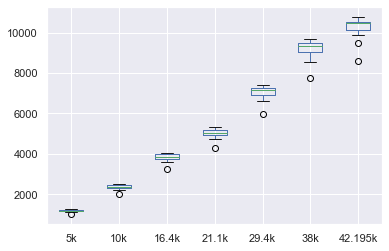

In [13]:
# Visualize the sub-3 table with a box plot
sub_three_boxplot = sub_three_df.plot.box(grid=True)
sub_three_boxplot.plot()
plt.show()

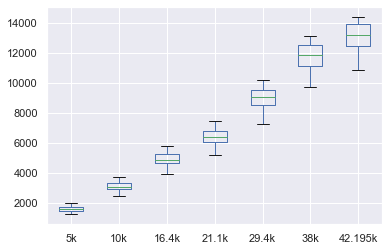

In [14]:
# Visualize the sub-4 table with a box plot
sub_three_boxplot = sub_four_df.plot.box(grid=True)
sub_three_boxplot.plot()
plt.show()

From here, I'm going refer to the 29.4k point as the pace separator because it's my point of interest in this study.

In [15]:
# Average speed until 29.4k in "second/km" among sub-3 runners
sub_three_before = sub_three_df['29.4k']/29.4
sub_three_before

0     202.925170
1     224.557823
2     232.993197
3     236.190476
4     232.959184
5     236.836735
6     233.401361
7     243.129252
8     233.401361
9     243.707483
10    238.809524
11    235.544218
12    242.925170
13    246.632653
14    246.122449
15    242.789116
16    240.034014
17    242.925170
18    238.945578
19    250.102041
20    250.136054
21    243.401361
22    235.034014
23    250.136054
24    251.428571
25    245.782313
26    249.829932
27    250.238095
Name: 29.4k, dtype: float64

In [16]:
# Average speed after 29.4k in "second/km" among sub-3 runners
sub_three_after = (sub_three_df['42.195k']-sub_three_df['29.4k'])/(42.195-29.4)
sub_three_after

0     204.923798
1     226.494725
2     237.202032
3     234.153966
4     248.456428
5     240.171942
6     250.722939
7     233.137945
8     260.101602
9     243.063697
10    255.334115
11    267.604533
12    251.738961
13    250.957405
14    252.676827
15    261.273935
16    267.682689
17    261.352091
18    270.652599
19    245.173896
20    245.408363
21    265.181712
22    289.175459
23    257.366159
24    254.708871
25    270.105510
26    261.742868
27    268.151622
dtype: float64

In [17]:
# Average speed until 29.4k in "second/km" among sub-4 runners
sub_four_before = sub_four_df['29.4k']/29.4
sub_four_before

0      253.163265
1      255.612245
2      253.061224
3      255.068027
4      250.272109
          ...    
419    328.673469
420    336.870748
421    336.870748
422    340.884354
423    345.748299
Name: 29.4k, Length: 424, dtype: float64

In [18]:
# Average speed after 29,4k in "second/km" among sub-4 runners
sub_four_after = (sub_four_df['42.195k']-sub_four_df['29.4k'])/(42.195-29.4)
sub_four_after

0      265.494334
1      260.805002
2      267.760844
3      265.806956
4      286.127394
          ...    
419    369.128566
420    350.449394
421    350.527550
422    341.695975
423    330.519734
Length: 424, dtype: float64

In [19]:
# Statistical test: comparing the before-and-after paces as dependant variables
from scipy import stats
stats.ttest_rel(sub_three_before, sub_three_after)

Ttest_relResult(statistic=-4.734548594370066, pvalue=6.216388697912961e-05)

In [20]:
stats.ttest_rel(sub_four_before, sub_four_after)

Ttest_relResult(statistic=-15.383378920964399, pvalue=9.901668088513279e-43)

## Conclusion

Both cases show extremely small p-values with far less than 0.01. P<0.01<α, therefore at 99% confidence level, I reject the Null Hyposis 1 and Null Hypothesis 2. ***Average running speed is significantly different before and after 29.4k both in sub-3 and sub-4 runners***.

## Average paces

Nontheless, even with a slower average speed for the last several kilometers in many cases, sub-3 runners still manage to run a full-marathon under 3 hours. So how fast did the sub-3 runners from Reykjavik Marathon 2019 run?

In [21]:
# Function to convert running time in seconds to min/km

def minute_per_km(seconds):
    m, s = divmod(np.mean(seconds), 60)
    m = round(m)
    s = round(s)
    if s < 10:
        text = str(m) + ":0" + str(s) + " min/km"
    else:
        text = str(m) + ":" + str(s) + " min/km"

    return text

In [22]:
minute_per_km(sub_three_before) # Incredible!

'4:00 min/km'

In [23]:
minute_per_km(sub_three_after) # Wow, still very fast!

'4:13 min/km'

In [24]:
minute_per_km(sub_four_before) # Not too bad!

'5:05 min/km'

In [25]:
minute_per_km(sub_four_after) # well, we might have slowed down, but we didn't give up!

'5:25 min/km'